# UNIVERSIDAD NACIONAL DE CÓRDOBA#
## Fa.M.A.F – Observatorio Astronómico ##
### Licenciatura en Astronomía ###
### Tapia Martina ###
### Astrometría 2020 ###
## Práctico N° 4: Inferencia Bayesiana con métodos MonteCarlo: Cadenas de Markov##

## Actividad 1 ##

Como primer paso para realizar este trabajo, se graficaran los datos pertenecientes a la función de luminosidad de galaxias obtenida por Blanton et al.(2001). Los datos correspondientes a la función de luminosidad se descargaron del aula virtual de la materia.


In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
from scipy import stats as st


In [2]:
datos = np.genfromtxt('datos2.dat',delimiter=',')
einf = np.genfromtxt('errores_inferiores.dat', delimiter = ',')
esup = np.genfromtxt('errores_superiores.dat', delimiter = ',')

In [22]:
x = datos[:,0]
y = datos[:,1]

In [4]:
ei = einf[:,1]
es = esup[:,1]

In [5]:
e1 = y- ei
e2 = es - y

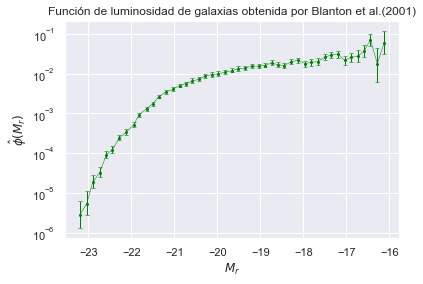

In [6]:
plt.title('Función de luminosidad de galaxias obtenida por Blanton et al.(2001)')
plt.xlabel('$M_{r}$')
plt.ylabel('$\hat \phi(M_{r})$')
plt.yscale('log')
plt.errorbar(x,y, yerr =(e1,e2),marker ='o', markersize=2, color='green',ecolor ='green',elinewidth=1,linewidth=0.5)
plt.plot(x,ei, '_g', markersize=4, )
plt.plot(x, es, '_g', markersize=4)
plt.show()

## Actividad 2 ##

En ésta actividad, se desea ajustar el modelo m al conjunto de datos d, mediante un análisis Bayesiano. Para el caso de los
datos de la actividad 1, se utilizará como modelo la función de Schechter:


$$ \Phi(M)dM = 0.4 * \ln(10)* \Phi_{*}* 10^{-0.4( M - M_{*})*(\alpha + 1 )} * e^{-10^{-0.4*(M-M_{*})}}dM $$  

Los parámetros que se intentan determinar son $\Phi_{*}$ , $M_{*}$ y $\alpha$. Para ello, se escribirá en python las siguientes funciones:
- la función de likelihood
- la función de priors
- la función de probabilidad posterior  

Estas funciones se necesitarán cuando se explore el espacio de parámetros.   

Lo que se busca es *determinar* claramente los parámetros de entrada y de salida de estas funciones e implementarlas en un programa. Además, se debe *explicitar* las hipótesis que intervienen en este planteo (especialmente respecto de los errores), la motivación de dichas hipótesis y las simplificaciones que se consiguen.  
Utilizando estas funciones, se tiene que implementar un algoritmo de *Metróopolis-Hastings* para explorar el espacio de paraámetros. Los parámetros del algoritmo son el largo de la cadena (un núumero entero) y las funciones prior. Se debe tener en cuenta que los priors contienen el conocimiento previo sobre los datos. Los priors más comunes son funciones planas y funciones gaussianas.  
Por último, se debe *explicar* qué parámetros intervienen, cómo y porqué se eligen sus valores y experimentar con distintas funciones de prior y evaluar su impacto en la realización de las cadenas.

In [46]:
#Se define una funcion modelo 

def model_Sche(phi0, M0,a, M):
    
    phi1 = []
    for i in range(len(M)):
        
        b = -0.4*(M[i]-M0)*(a+1)
        c = -0.4*(M[i]-M0)
        phi = 0.4 * math.log(10) * phi0 * 10**b * math.exp(-10**c)
        #phi2 = math.log10(phi)
        phi1.append(phi)
    
    return(phi1)

In [50]:
#Se verifica si el modelo funciona
M1= np.linspace(-16,-23,100)

In [54]:
y1 = model_Sche(phi0=1.46E-2,M0=-20.83,a=-1.20,M=M1)

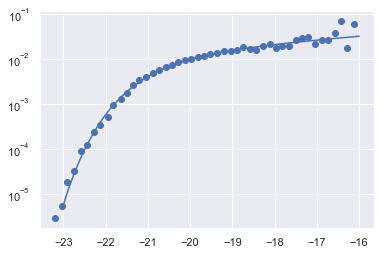

In [55]:
plt.yscale('log')
plt.scatter(x,y)
plt.plot(M1,y1)
plt.show()

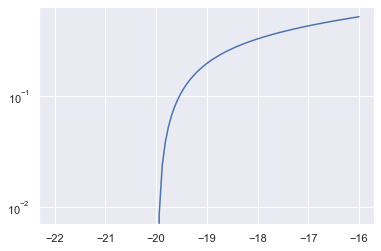

In [42]:
plt.yscale('log')
plt.plot(M1,y1)

In [35]:
#Se calcula el error
s = (es - ei)/2
s

array([2.47240000e-06, 4.30583000e-06, 7.33110000e-06, 9.71540000e-06,
       1.73149500e-05, 2.33495000e-05, 3.25400000e-05, 5.11420000e-05,
       6.87225000e-05, 1.20394000e-04, 1.47078500e-04, 1.98344000e-04,
       2.99220500e-04, 3.88711500e-04, 5.36975000e-04, 5.64891000e-04,
       6.31926000e-04, 8.72958000e-04, 8.20923000e-04, 9.89626500e-04,
       1.26861800e-03, 1.31693550e-03, 1.23843650e-03, 1.38540000e-03,
       1.77596650e-03, 1.54980300e-03, 2.06238500e-03, 1.73371500e-03,
       2.14093500e-03, 2.48621500e-03, 2.22247700e-03, 2.40357300e-03,
       3.00787650e-03, 3.24136200e-03, 2.97182600e-03, 3.62948250e-03,
       3.76771900e-03, 4.89457350e-03, 5.47540350e-03, 6.37806700e-03,
       5.71601000e-03, 6.89067550e-03, 9.98580450e-03, 1.34664515e-02,
       2.44869600e-02, 1.89398885e-02, 4.45816000e-02])

In [66]:
def likelihood(phi,phi0,M0,a,M,sig):
    
    phi_model = model_Sche(phi0,M0,a,M)
    
    p = st.norm(loc=phi_model, scale=sig).pdf(phi)
    print(p)
    l = p.prod()
    return(l)

In [67]:
likelihood(phi=y, phi0=1.46E-2,M0=-20.83,a=-1.20,M=x,sig=s)

[1.29888373e+05 8.94526754e+04 3.23041264e+04 3.78504053e+04
 6.68302008e+03 1.70124593e+04 1.12416790e+04 4.11718622e+03
 5.14253117e+02 3.31097815e+03 2.42904474e+03 1.78348866e+03
 8.83598983e+02 6.36084967e+02 7.05680283e+02 5.82267236e+02
 6.06931470e+02 4.48673456e+02 4.85967169e+02 3.22608310e+02
 3.00781135e+02 3.01968072e+02 3.21015185e+02 2.87957275e+02
 2.12372717e+02 2.55789501e+02 1.75919256e+02 2.30108340e+02
 1.85623197e+02 1.33135321e+02 1.50487341e+02 8.90945600e+01
 1.30869971e+02 1.14955501e+02 7.15764579e+01 8.35926282e+01
 8.02871047e+01 7.27522252e+01 5.06724605e+01 3.98635588e+01
 5.03494808e+01 5.71916222e+01 3.97948783e+01 2.36959568e+01
 3.80305329e+00 1.68184190e+01 7.38285536e+00]


4.529434606468913e+121